<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on practice lab: Model Development**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired in throughout the module, and use linear regression principles to create a model that predicts the Price of the laptop, based on one or more attributes of the dataset.


# Objectives

After completing this lab you will be able to:

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

### Importing the dataset
Run the cell below to download the dataset into this environment.

This function will download the dataset into your browser


In [4]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath)
df = df.iloc[:,2:]
df

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


In [5]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)


The first 5 rows of the dataframe


,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 : Single Linear Regression

You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


In [6]:
lm = LinearRegression()

x1 = df[['CPU_frequency']]
y = df['Price']

lm.fit(x1,y)

y_hat = lm.predict(x1)


Check the intercept and the slope of the model

In [7]:
lm.intercept_

253.66117068582116

In [8]:
lm.coef_

array([1485.19362648])

Interpretation: The relationship between Price and CPU_frequency can be described by the next formula:

 Price = 253.66 + CPU_frequency*1485.19

Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


c:\Users\Mateo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mateo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


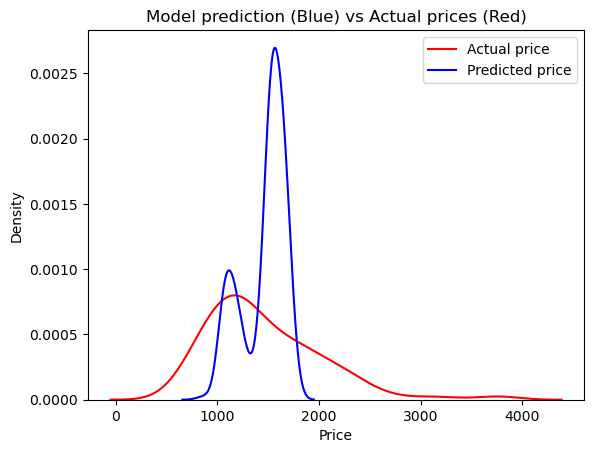

In [9]:
# Write your code below and press Shift+Enter to execute 
ax = sns.distplot(y, hist=False ,color='r', label='Real value')
sns.distplot(y_hat,hist=False,color='b', label='Fitted value', ax=ax) 

plt.title('Model prediction (Blue) vs Actual prices (Red)')
plt.xlabel('Price')
plt.legend(['Actual price', 'Predicted price'])
plt.show()

Not the best model to predict the actual prices.

Evaluate the Mean Squared Error and R^2 score values for the model. 


In [10]:
print('The R2 of the model is: ', r2_score(df['Price'], y_hat))
print('The MSE score of the model is: ', mean_squared_error(df['Price'],y_hat))

The R2 of the model is:  0.1344436321024326
The MSE score of the model is:  284583.4405868629


Interpretation: 

R2: The model can explain about 13% of the price only using CPU_frequency as independent variable.

MSE: The mean squared error per prediction is 284k USD, if we take the squared root of this value we get that the mean error is around 16k USD.

# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system. 


In [11]:
X = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' , 'Category']]
Y = df[['Price']]

lm_multiple = lm.fit(X,Y)

y_hat2 = lm_multiple.predict(X)

Plot the Distribution graph of the predicted values as well as the Actual values


c:\Users\Mateo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mateo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


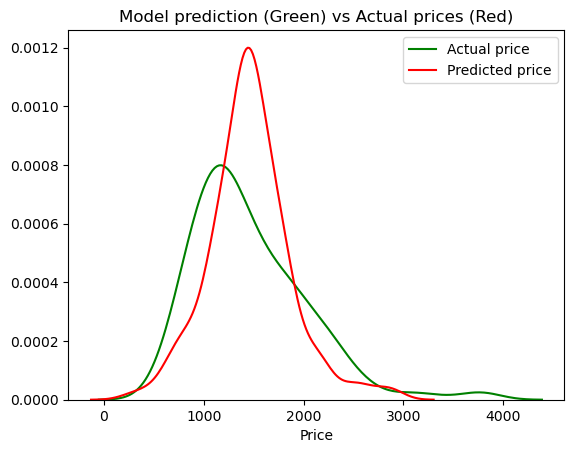

In [12]:
# Write your code below and press Shift+Enter to execute
ax_m = sns.distplot(Y , hist=False, color='g', label='Real values')

sns.distplot(y_hat2, hist=False,color='r',label='Predicted values', ax=ax_m)

plt.title('Model prediction (Green) vs Actual prices (Red)')
plt.xlabel('Price')
plt.ylabel('')
plt.legend(['Actual price', 'Predicted price'])
plt.show()

Interpretation: We can see that this model gets closer to the actual prices than the previous model that is only using one independent variable.

Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [13]:
print('The R2 of the model is: ', r2_score(df['Price'], y_hat2))
print('The MSE score of the model is: ', mean_squared_error(df['Price'],y_hat2))

The R2 of the model is:  0.5082509055187374
The MSE score of the model is:  161680.5726389311


Interpretation: 

R2:_ The multiple linear regression model we just developed can explain about 50% of the laptop's price (a clear improvement from last model) although there is still much room to improve.


MSE: The MSE of the model is 161.680 which makes the mean error about 400 USD from the real prices.

# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`. 


In [14]:
#  Write your code below and press Shift+Enter to execute
x1 = df[['CPU_frequency']]

x1 = x1.to_numpy().flatten()
f = np.polyfit(x1, y,1)
p = np.poly1d(f)

print(p)

f3 = np.polyfit(x1, y,3)
p3 = np.poly1d(f3)

print(p3)


f5 = np.polyfit(x1, y,5)
p5 = np.poly1d(f5)

print(p5)


 
1485 x + 253.7
           3             2
3.409e+04 x - 6.574e+04 x + 4.129e+04 x - 7238
           5            4             3             2
1.357e+06 x - 4.72e+06 x + 6.458e+06 x - 4.336e+06 x + 1.425e+06 x - 1.818e+05


Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.


In [15]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.


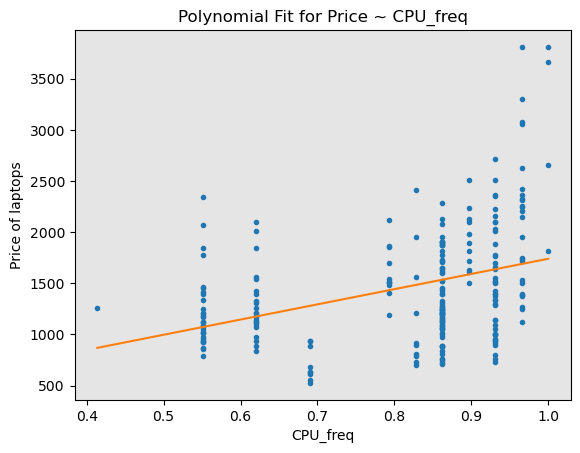

In [16]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 1

PlotPolly(p,x1,y,'CPU_freq')


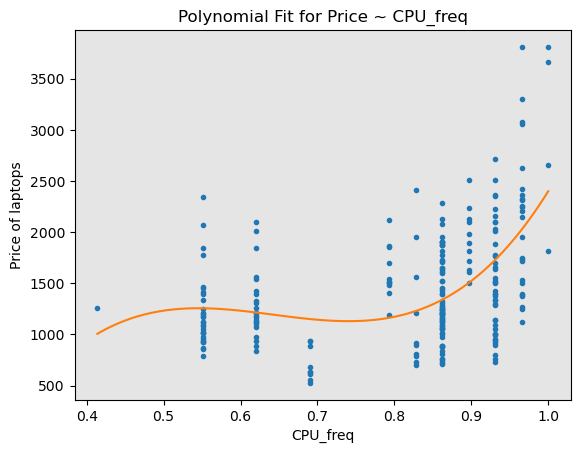

In [17]:
PlotPolly(p3,x1,y,'CPU_freq')

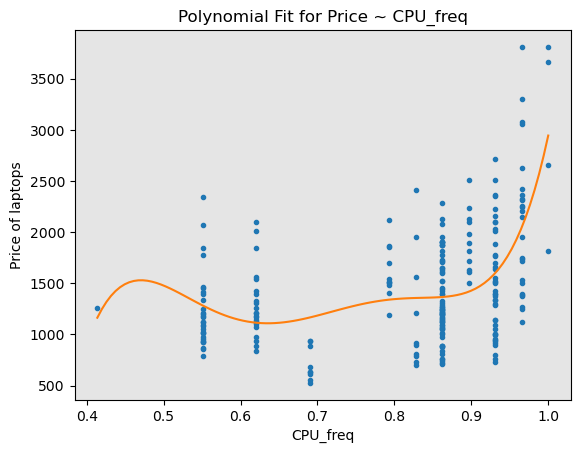

In [18]:
PlotPolly(p5,x1,y,'CPU_freq')

Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.


In [36]:
#  Write your code below and press Shift+Enter to execute
print('The R2 for the degree 1 model is ' , r2_score(y,p(x1)))
print('The R2 for the degree 3 model is ' , r2_score(y,p3(x1)))
print('The R2 for the degree 5 model is ' , r2_score(y,p5(x1)))


print('\nAs we go up in the degrees of the polynomial models the R2 is going up, which means the model can explain better the data shown.\nHowever, a higher degree polynomial can also mean that the model is overfitting the information given which can lead to inefficient and inconsistent predictions.')

The R2 for the degree 1 model is  0.1344436321024326
The R2 for the degree 3 model is  0.2669264079653094
The R2 for the degree 5 model is  0.3030822706442371

As we go up in the degrees of the polynomial models the R2 is going up, which means the model can explain better the data shown.
However, a higher degree polynomial can also mean that the model is overfitting the information given which can lead to inefficient and inconsistent predictions.


# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. 


In [49]:
#  Write your code below and press Shift+Enter to execute
Input = [ ('scale', StandardScaler()), ('Polynomial',PolynomialFeatures(include_bias=False)),  ('model',LinearRegression() ) ]

pipe = Pipeline(Input)

z = x1.reshape(-1,1)

pipe.fit(z, y)

yhat_pipe = pipe.predict(z)

Evaluate the MSE and R^2 values for the this predicted output.


In [52]:
#  Write your code below and press Shift+Enter to execute
print('The MSE of the model using the pipeline is: ', mean_squared_error(y,yhat_pipe))
print('The R2 of the model using the pipeline is: ', r2_score(y,yhat_pipe))



The MSE of the model using the pipeline is:  249022.6659675117
The R2 of the model using the pipeline is:  0.24260120745423774


You should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.
